In [1]:
# import data manipulation library
import numpy as np
import pandas as pd
# import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# import data filter warning library
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import data using url from github
url = 'https://raw.githubusercontent.com/singhakhilesh712/SUUPLYCHAIN/refs/heads/main/Supply_Chain.csv'

df = pd.read_csv(url)

df.sample(frac = 1)  #data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
16308,WH_116308,EID_66308,Urban,Mid,North,Zone 4,8,0,2,4932,...,0,105,25.0,2015.0,13,1,A+,3,26,17091
4787,WH_104787,EID_54787,Rural,Small,West,Zone 6,5,0,4,5621,...,1,149,38.0,2006.0,23,0,B+,5,15,29093
3022,WH_103022,EID_53022,Rural,Small,East,Zone 6,3,0,5,5199,...,1,128,26.0,NaN,15,0,B,6,15,17150
20108,WH_120108,EID_70108,Rural,Large,North,Zone 5,6,0,2,4365,...,0,233,24.0,2015.0,11,1,A+,2,5,15073
19569,WH_119569,EID_69569,Rural,Large,South,Zone 5,5,0,2,3777,...,0,247,NaN,2020.0,5,0,C,2,25,6106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13664,WH_113664,EID_63664,Rural,Small,North,Zone 6,8,0,3,5821,...,1,128,36.0,2013.0,16,0,C,3,9,22131
15748,WH_115748,EID_65748,Rural,Large,North,Zone 6,1,0,1,5001,...,1,66,32.0,NaN,11,0,B+,2,28,13063
3093,WH_103093,EID_53093,Rural,Large,North,Zone 5,7,4,2,4549,...,1,201,28.0,NaN,23,0,A,5,24,29077
9945,WH_109945,EID_59945,Rural,Small,West,Zone 6,8,0,2,5343,...,1,226,NaN,2018.0,13,0,C,1,9,18057


In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
# Checking Data Description: - Univariate Analysis
'''
Following Data is found out to be Non-Normal Disributed, Since mean != median
'''
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


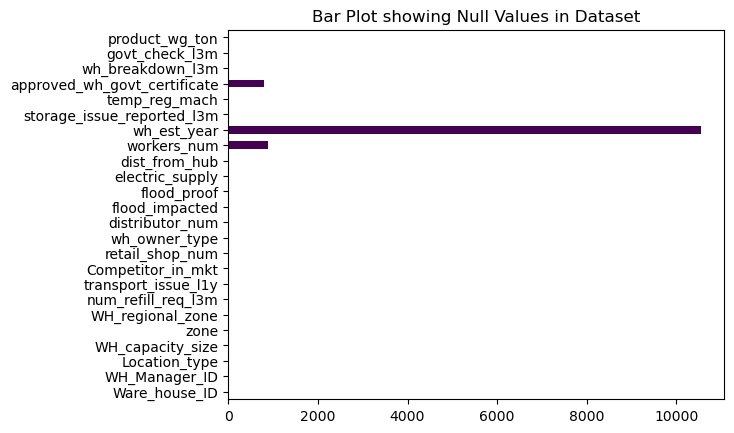

In [5]:
# Checking Null Values I dataset
df.isnull().sum().plot(kind = 'barh', cmap = 'viridis')
plt.title('Bar Plot showing Null Values in Dataset')
plt.axline
plt.show()

In [6]:
# Calculate Missing value percentage:-
(df['approved_wh_govt_certificate'].isnull().sum() / len(df['approved_wh_govt_certificate']))*100

3.6343115124153504

In [8]:
(df['wh_est_year'].isnull().sum() / len(df['wh_est_year']))*100

47.60722347629797

In [9]:
df['wh_est_year'].value_counts().head(10)

2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: wh_est_year, dtype: int64

In [10]:
df['wh_est_year'].quantile(0.75),df['wh_est_year'].quantile(0.75)

(2016.0, 2016.0)

In [11]:
df['wh_est_year'].median()

2009.0

In [12]:
df['wh_est_year'].mean()

2009.4012063765617

In [14]:
# Imputing the missing value column
df['wh_est_year'].fillna(2009,inplace = True)

In [15]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace = True)